# Milestone #4 for Final Project #


***Basic Information***

CSCI E-109a

***Team-members:***

Joshua Coffie and Timur Zambalayev

***Submitted on November 28, 2016***

In [5]:
# Importing packages

from collections import Counter
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline

ratings_df.shape: (100004, 4)

raw ratings data:


,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-14 02:52:24
1,1,1029,3.0,2009-12-14 02:52:59
2,1,1061,3.0,2009-12-14 02:53:02
3,1,1129,2.0,2009-12-14 02:53:05
4,1,1172,4.0,2009-12-14 02:53:25



mean rating: 3.5436, std: 1.0581


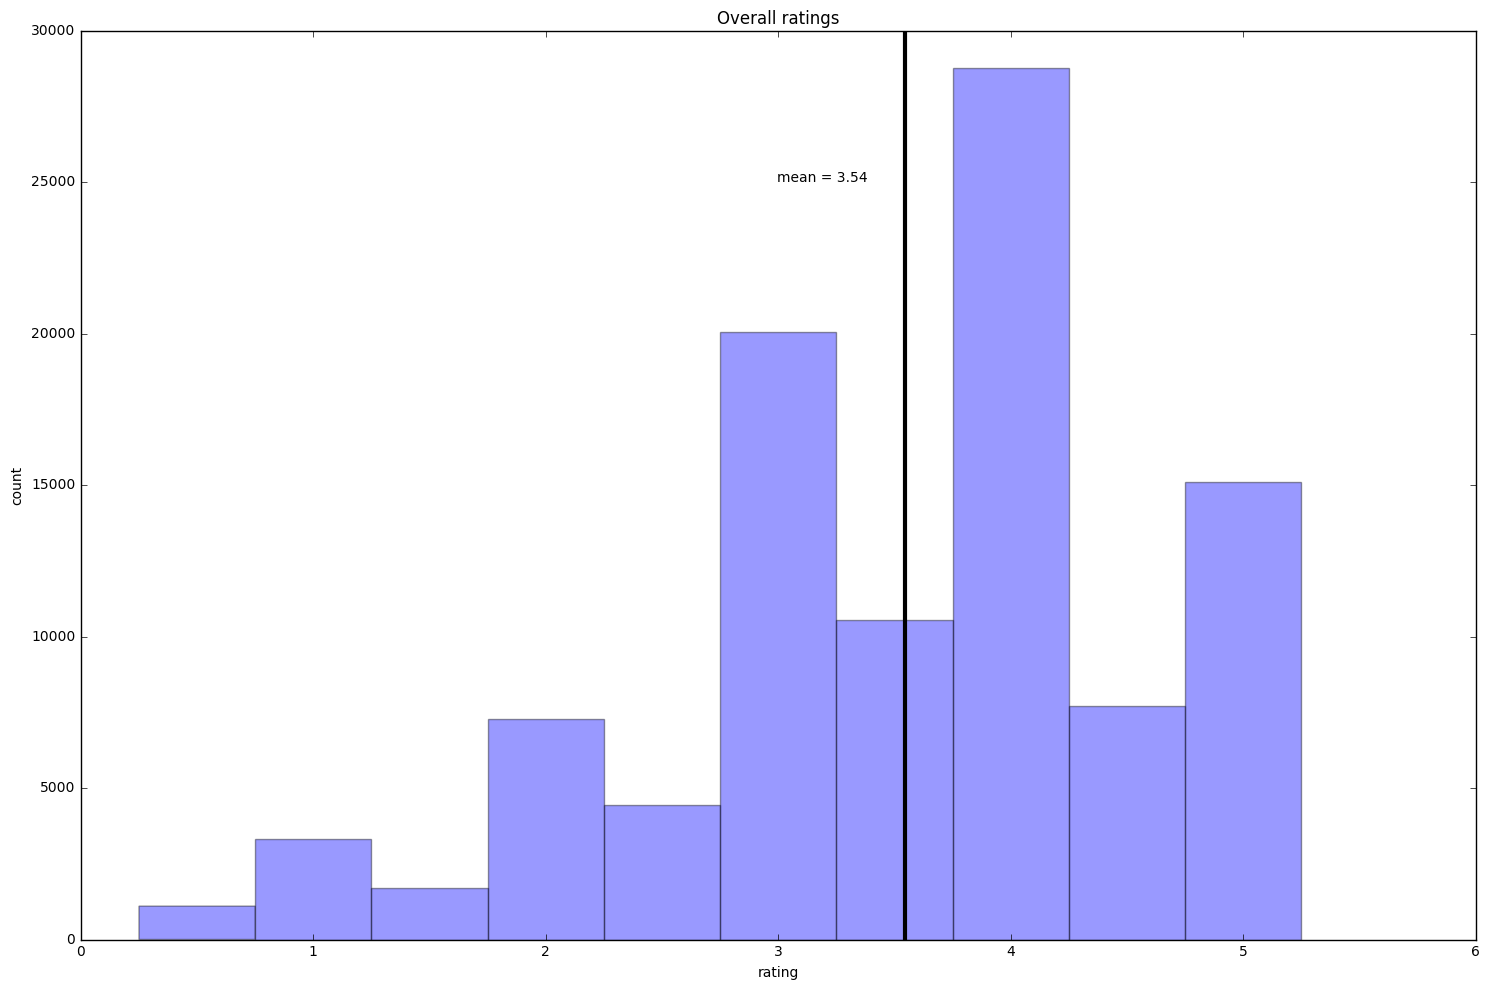

In [2]:
def date_parse(time_in_secs):
    return datetime.utcfromtimestamp(float(time_in_secs))


def read_data():
    ratings_df = pd.read_csv('ml-latest-small/ratings.csv', parse_dates=['timestamp'], date_parser=date_parse)
    return ratings_df


def get_fig_size(nrows=1):
    return 15, 10 * nrows


def show_ratings_histogram(ratings):
    _, ax = plt.subplots(1, 1, figsize=get_fig_size())

    ax.hist(ratings, bins=np.arange(0.25, 5.5, step=0.5), alpha=0.4)

    ratings_mean = ratings.mean()

    ax.axvline(x=ratings_mean, linewidth=3, color='k')
    plt.text(ratings_mean - 0.55, 25000, 'mean = %.2f' % ratings_mean)

    ax.set_xlabel('rating')
    ax.set_ylabel('count')
    ax.set_title('Overall ratings')

    plt.tight_layout()
    plt.show()


def explore_data(ratings_df):
    print 'ratings_df.shape: %s\n' % (ratings_df.shape,)

    print 'raw ratings data:'
    display(ratings_df.head())
    print

    ratings = ratings_df['rating']

    print 'mean rating: %.4f, std: %.4f' % (ratings.mean(), ratings.std())

    show_ratings_histogram(ratings)

    
ratings_df = read_data()

explore_data(ratings_df)

For our first baseline model we will calculate the total rating mean for the train set (should be around 3.54) and all our predictions will be this total rating mean. Let's check the score ($R^2$) for the train and test sets.

In [3]:
def get_xy(ratings_df):
    y = ratings_df['rating']
    x = ratings_df.drop('rating', axis=1)
    return x, y


def get_y_pred_total_mean_model(y_mean, x):
    shape = (len(x),)
    return np.full(shape, y_mean)


def get_scores(y_test, y_test_pred, y_train, y_train_pred):
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    return train_score, test_score


def fit_total_mean_model(ratings_df):
    train_scores = []
    test_scores = []
    n_iter = 100
    for _ in xrange(n_iter):
        train_df, test_df = train_test_split(ratings_df)

        x_train, y_train = get_xy(train_df)
        x_test, y_test = get_xy(test_df)

        y_mean = y_train.mean()

        y_train_pred = get_y_pred_total_mean_model(y_mean, x_train)
        y_test_pred = get_y_pred_total_mean_model(y_mean, x_test)

        train_score, test_score = get_scores(y_test, y_test_pred, y_train, y_train_pred)

        train_scores.append(train_score)
        test_scores.append(test_score)

    print 'mean train score: %f, std: %f' % (np.mean(train_scores), np.std(train_scores))
    print 'mean test score: %f, std: %f' % (np.mean(test_scores), np.std(test_scores))

    
fit_total_mean_model(ratings_df)

mean train score: 0.000000, std: 0.000000
mean test score: -0.000047, std: 0.000064


Not surprisingly the train score is the perfect zero. The test score is also very close to zero.

We can also consider baseline models that will use mean user ratings and mean movie ratings.

How many users? 671
The maximum user mean rating: 4.95
The mean user mean rating: 3.66, std: 0.47
The minimum user mean rating: 1.33


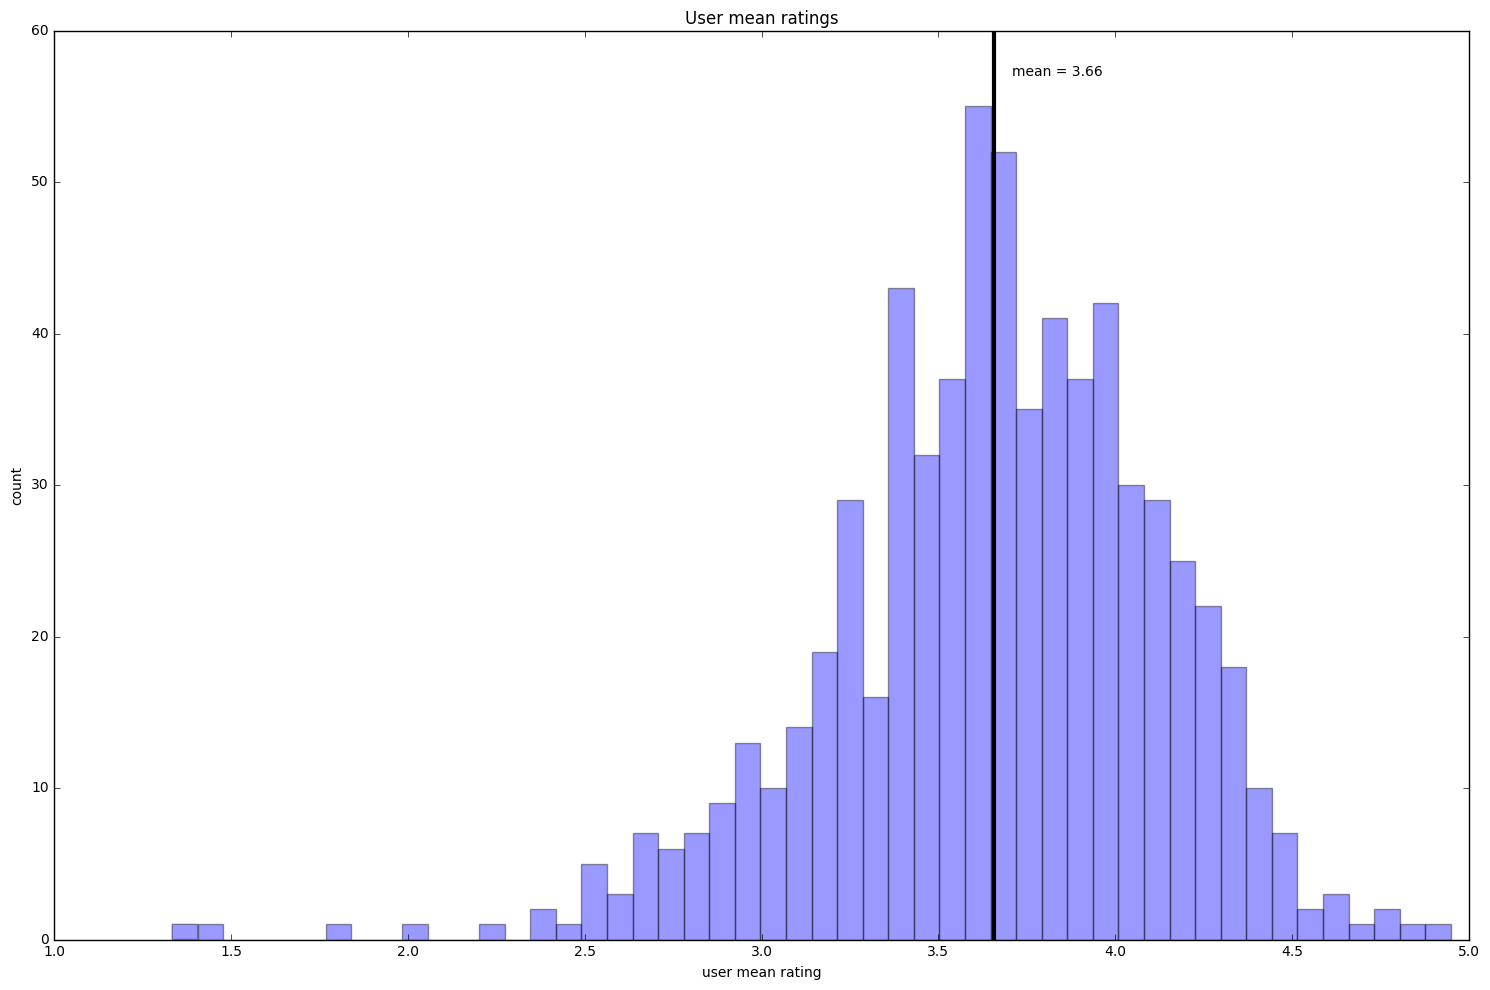

mean train score: 0.1868, std: 0.0012
mean test score: 0.1703, std: 0.0037


In [10]:
def get_mean_user_ratings(train_df):
    return train_df.groupby('userId')['rating'].mean()


def show_user_mean_ratings_histogram(ratings_df):
    user_ratings = get_mean_user_ratings(ratings_df)

    print 'The maximum user mean rating: %.2f' % user_ratings.max()
    user_ratings_mean = user_ratings.mean()
    print 'The mean user mean rating: %.2f, std: %.2f' % (user_ratings_mean, user_ratings.std())
    print 'The minimum user mean rating: %.2f' % user_ratings.min()

    _, ax = plt.subplots(1, 1, figsize=get_fig_size())

    ax.hist(user_ratings, bins=50, alpha=0.4)

    ax.axvline(x=user_ratings_mean, linewidth=3, color='k')
    plt.text(user_ratings_mean + 0.05, 57, 'mean = %.2f' % user_ratings_mean)

    ax.set_xlabel('user mean rating')
    ax.set_ylabel('count')
    ax.set_title('User mean ratings')

    plt.tight_layout()
    plt.show()


def explore_mean_user_ratings(ratings_df):
    user_ids = ratings_df['userId']

    print 'How many users?', len(set(user_ids))

    show_user_mean_ratings_histogram(ratings_df)


def get_y_pred_mean_user_ratings_model(mean_user_ratings, x):
    return [mean_user_ratings[row['userId']] for _, row in x.iterrows()]


def fit_mean_user_ratings_model(ratings_df):
    train_scores = []
    test_scores = []
    n_iter = 4
    for _ in xrange(n_iter):
        train_df, test_df = train_test_split(ratings_df)

        x_train, y_train = get_xy(train_df)
        x_test, y_test = get_xy(test_df)

        mean_user_ratings = get_mean_user_ratings(train_df)

        y_train_pred = get_y_pred_mean_user_ratings_model(mean_user_ratings, x_train)
        y_test_pred = get_y_pred_mean_user_ratings_model(mean_user_ratings, x_test)

        train_score, test_score = get_scores(y_test, y_test_pred, y_train, y_train_pred)

        train_scores.append(train_score)
        test_scores.append(test_score)

    print 'mean train score: %.4f, std: %.4f' % (np.mean(train_scores), np.std(train_scores))
    print 'mean test score: %.4f, std: %.4f' % (np.mean(test_scores), np.std(test_scores))

    
explore_mean_user_ratings(ratings_df)
fit_mean_user_ratings_model(ratings_df)

In this model we use the mean user rating for our predictions. It gave us some improvement (test $R^2$=0.17 vs 0.00 for the total mean rating model).

How many movies? 9,066

The maximum number of ratings per movie: 341
The mean number of ratings per movie: 11.03
The minimum number of ratings per movie: 1

Number of movies with one rating: 3,063
Number of movies with two ratings: 1,202

The maximum movie mean rating: 5.00
The mean movie mean rating: 3.29, std: 0.88
The minimum movie mean rating: 0.50


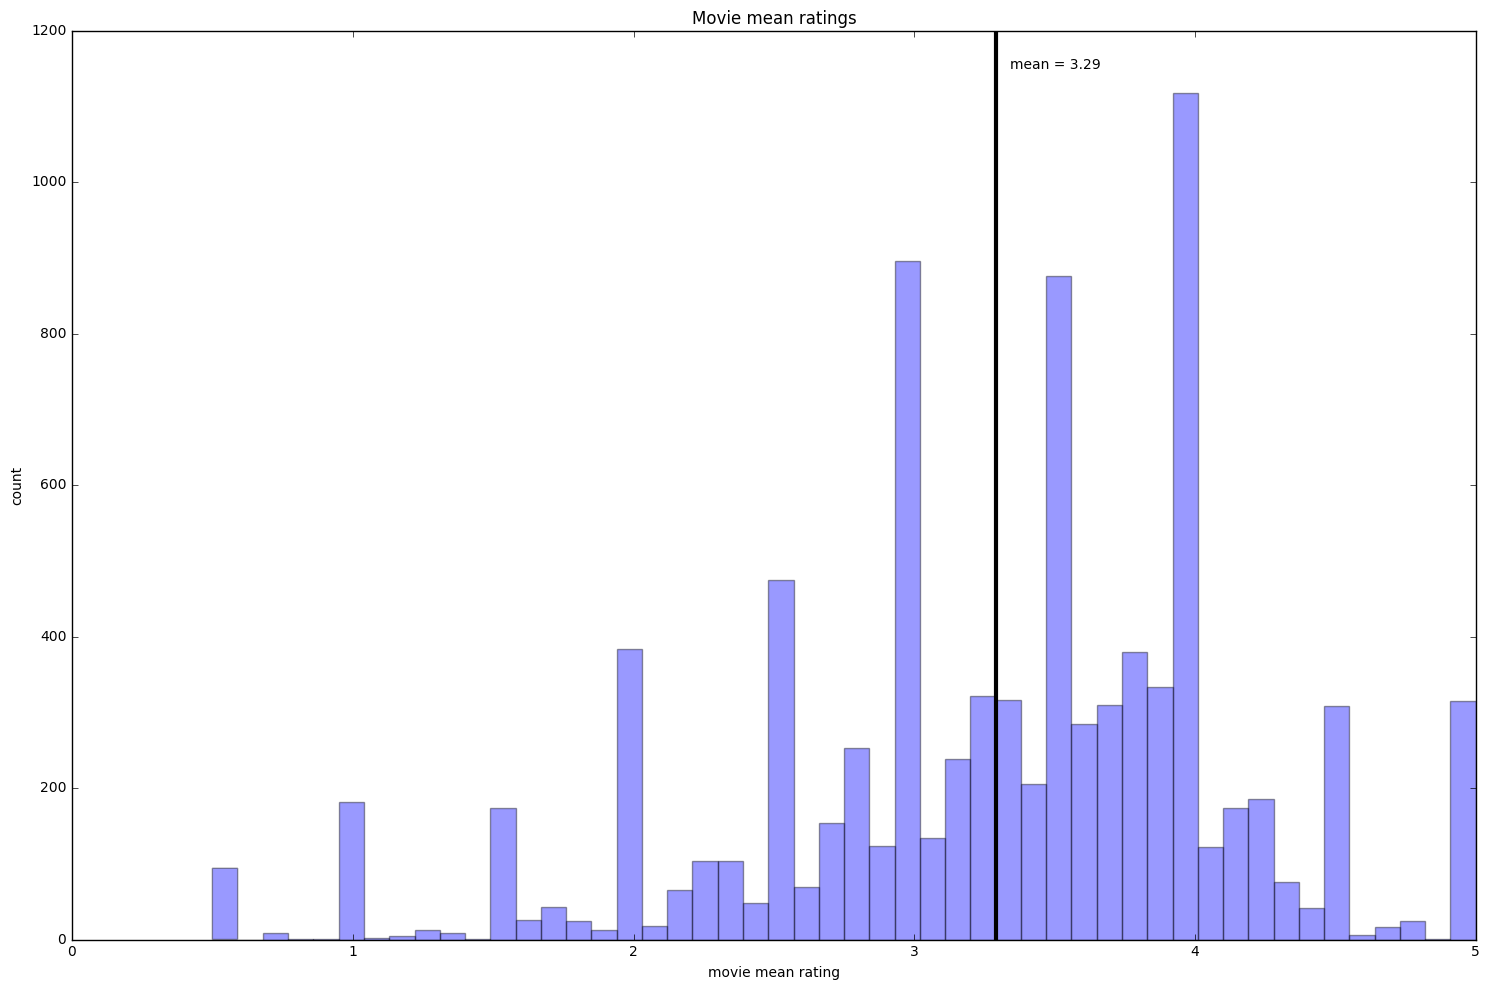

mean train score: 0.2958, std: 0.0006
mean test score: 0.1222, std: 0.0014


In [9]:
def get_mean_movie_ratings(ratings_df):
    return ratings_df.groupby('movieId')['rating'].mean()


def show_movie_mean_ratings_histogram(ratings_df):
    movie_mean_ratings = get_mean_movie_ratings(ratings_df)

    print 'The maximum movie mean rating: %.2f' % movie_mean_ratings.max()
    movie_ratings_mean = movie_mean_ratings.mean()
    print 'The mean movie mean rating: %.2f, std: %.2f' % (movie_ratings_mean, movie_mean_ratings.std())
    print 'The minimum movie mean rating: %.2f' % movie_mean_ratings.min()

    _, ax = plt.subplots(1, 1, figsize=get_fig_size())

    ax.hist(movie_mean_ratings, bins=50, alpha=0.4)

    ax.axvline(x=movie_ratings_mean, linewidth=3, color='k')
    plt.text(movie_ratings_mean + 0.05, 1150, 'mean = %.2f' % movie_ratings_mean)

    ax.set_xlabel('movie mean rating')
    ax.set_ylabel('count')
    ax.set_title('Movie mean ratings')

    plt.tight_layout()
    plt.show()


def explore_mean_movie_ratings(ratings_df):
    movie_ids = ratings_df['movieId']

    print 'How many movies? {:,}\n'.format(len(set(movie_ids)))

    num_ratings_per_movie = Counter(movie_ids).values()

    mean = np.mean(num_ratings_per_movie)
    print 'The maximum number of ratings per movie: %.0f' % np.max(num_ratings_per_movie)
    print 'The mean number of ratings per movie: %.2f' % mean
    print 'The minimum number of ratings per movie: %.0f\n' % np.min(num_ratings_per_movie)

    num_ratings_per_movie_counter = Counter(num_ratings_per_movie)

    print 'Number of movies with one rating: {:,}'.format(num_ratings_per_movie_counter[1])
    print 'Number of movies with two ratings: {:,}\n'.format(num_ratings_per_movie_counter[2])

    show_movie_mean_ratings_histogram(ratings_df)


def get_y_pred_mean_movie_ratings_model(mean_movie_ratings, mean_user_ratings, x):
    return [mean_movie_ratings.get(row['movieId'], mean_user_ratings[row['userId']]) for _, row in x.iterrows()]


def fit_mean_movie_ratings_model(ratings_df):
    train_scores = []
    test_scores = []
    n_iter = 4
    for _ in xrange(n_iter):
        train_df, test_df = train_test_split(ratings_df)

        x_train, y_train = get_xy(train_df)
        x_test, y_test = get_xy(test_df)

        mean_movie_ratings = get_mean_movie_ratings(train_df)
        mean_user_ratings = get_mean_user_ratings(train_df)

        y_train_pred = get_y_pred_mean_movie_ratings_model(mean_movie_ratings, mean_user_ratings, x_train)
        y_test_pred = get_y_pred_mean_movie_ratings_model(mean_movie_ratings, mean_user_ratings, x_test)

        train_score, test_score = get_scores(y_test, y_test_pred, y_train, y_train_pred)

        train_scores.append(train_score)
        test_scores.append(test_score)

    print 'mean train score: %.4f, std: %.4f' % (np.mean(train_scores), np.std(train_scores))
    print 'mean test score: %.4f, std: %.4f' % (np.mean(test_scores), np.std(test_scores))

    
explore_mean_movie_ratings(ratings_df)
fit_mean_movie_ratings_model(ratings_df)

Now we use the mean movie rating as a prediction. One problem is that there are a lot of movies for which we have only one rating. In this case we use the mean user rating as a prediction.

This give us better results than the the total mean rating model (test $R^2$ = 0.13 vs 0.00). This model is worse than the mean user rating model (test $R^2$ = 0.17).

It means that if we had to choose, the user mean rating is a better predictor than the movie mean rating.

We can also notice significant difference between train and test scores. It can be explained by the perfect predictions for movies with one rating for the train set.

In [7]:
def calculate_movie_effect(ratings, y_mean, movie_lambda):
    return (ratings - y_mean).sum() / (movie_lambda + len(ratings))


def calculate_movie_effects(y_mean, movie_lambda, movie_ratings):
    return movie_ratings.agg(lambda ratings: calculate_movie_effect(ratings, y_mean, movie_lambda))


def calculate_user_effect(ratings_df, y_mean, user_lambda, movie_effects):
    s = 0.0
    for _, row in ratings_df.iterrows():
        s += row['rating'] - y_mean - movie_effects[row['movieId']]

    return s / (user_lambda + len(ratings_df))


def calculate_user_effects(y_mean, user_lambda, user_groups, movie_effects):
    user_ids = []
    user_effects = []

    for user_id, group in user_groups:
        user_effect = calculate_user_effect(group, y_mean, user_lambda, movie_effects)

        user_ids.append(user_id)
        user_effects.append(user_effect)

    return pd.Series(user_effects, index=user_ids)


def get_y_pred_user_and_movie_effects_model(y_mean, movie_effects, user_effects, x):
    return [y_mean + movie_effects.get(row['movieId'], 0.0) + user_effects[row['userId']] for _, row in x.iterrows()]


def fit_user_and_movie_effects_model(ratings_df):
    train_scores = []
    test_scores = []
    n_iter = 3

    movie_lambda = 5.0
    user_lambda = 20.0

    for _ in xrange(n_iter):
        train_df, test_df = train_test_split(ratings_df)

        x_train, y_train = get_xy(train_df)
        x_test, y_test = get_xy(test_df)

        y_mean = y_train.mean()

        movie_ratings = train_df.groupby('movieId')['rating']
        user_groups = train_df.groupby('userId')

        movie_effects = calculate_movie_effects(y_mean, movie_lambda, movie_ratings)
        user_effects = calculate_user_effects(y_mean, user_lambda, user_groups, movie_effects)

        y_train_pred = get_y_pred_user_and_movie_effects_model(y_mean, movie_effects, user_effects, x_train)
        y_test_pred = get_y_pred_user_and_movie_effects_model(y_mean, movie_effects, user_effects, x_test)

        train_score, test_score = get_scores(y_test, y_test_pred, y_train, y_train_pred)

        train_scores.append(train_score)
        test_scores.append(test_score)

    print 'mean train score: %.4f, std: %.4f' % (np.mean(train_scores), np.std(train_scores))
    print 'mean test score: %.4f, std: %.4f' % (np.mean(test_scores), np.std(test_scores))

    
fit_user_and_movie_effects_model(ratings_df)

mean train score: 0.3661, std: 0.0006
mean test score: 0.2830, std: 0.0027


In this model we take into account both item (movie) and user effects. It's the same baseline prediction used in the ["The BellKor Solution to the Netflix Grand Prize" article by Yehuda Koren](http://www.netflixprize.com/assets/GrandPrize2009_BPC_BellKor.pdf). 

The test score is even better ($R^2$ = 0.28 vs 0.17 for the mean user rating model).